In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'D:/data_science/Research/GroundTruthJSONlog_2.csv')
df.head(2)

,type,time,sender,attackerType,messageID,pos__001,pos__002,pos__003,pos_noise__001,pos_noise__002,pos_noise__003,spd__001,spd__002,spd__003,spd_noise__001,spd_noise__002,spd_noise__003
0,4,10800.065710,25,0,38,3594.503928,5822.136692,1.895,0.0,0.0,0.0,-0.020621,-35.392890,0.0,0.0,0.0,0.0
1,4,10800.241039,37,0,63,3588.387672,6003.151424,1.895,0.0,0.0,0.0,2.733597,36.816215,0.0,0.0,0.0,0.0


In [3]:
df.drop(['type','pos_noise__001','pos_noise__002','pos_noise__003','spd_noise__001','spd_noise__002','spd_noise__003','spd__003'],axis = 1, inplace = True)

In [4]:
df.head(2)

,time,sender,attackerType,messageID,pos__001,pos__002,pos__003,spd__001,spd__002
0,10800.065710,25,0,38,3594.503928,5822.136692,1.895,-0.020621,-35.392890
1,10800.241039,37,0,63,3588.387672,6003.151424,1.895,2.733597,36.816215


In [5]:
x = df[['time','sender','messageID','pos__001','pos__002','pos__003','spd__001','spd__002']]
y = df.iloc[:,2:3].values

In [6]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

Using TensorFlow backend.
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jayesh\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [7]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [8]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
#Building Model
from sklearn.naive_bayes import GaussianNB
reg = GaussianNB()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)


In [10]:

#checking Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.84%


[[168  92]
 [ 25 243]]


C:\Users\Jayesh\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1, 'Naive Bayes')

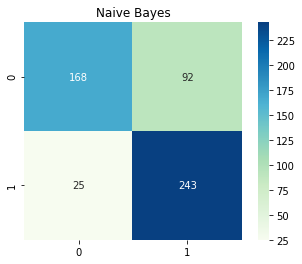

In [11]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
print(con)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
ax.set_title('Naive Bayes')

In [12]:
from sklearn.metrics import classification_report
print('Naive Bayes')
print(classification_report(y_test, y_pred))


Naive Bayes
              precision    recall  f1-score   support

           0       0.87      0.65      0.74       260
           2       0.73      0.91      0.81       268

    accuracy                           0.78       528
   macro avg       0.80      0.78      0.77       528
weighted avg       0.80      0.78      0.77       528



[9.36122442e-01 7.32414996e-01 5.21982711e-01 6.78174625e-01
 9.37488908e-01 9.52975106e-01 8.81261966e-01 9.53429133e-01
 8.80347528e-01 3.60565158e-01 1.57989703e-01 5.84546650e-02
 8.62631839e-01 4.55491935e-04 4.95023437e-02 5.77955506e-01
 6.74462736e-01 9.57403820e-01 1.83976065e-01 9.68120793e-03
 8.80703979e-01 5.43100405e-01 8.40505866e-05 9.31496370e-01
 9.36216273e-01 8.02090568e-01 8.78224245e-01 7.20870989e-04
 2.52573766e-03 6.55657886e-03 7.41835621e-01 7.19022605e-01
 6.21651164e-01 7.33467263e-01 8.58196712e-01 8.14951693e-01
 9.22991699e-01 2.60802578e-02 1.84858185e-03 7.26998106e-01
 6.39532717e-01 4.75899866e-01 9.55629055e-01 8.77045447e-01
 9.31132623e-01 9.64547645e-01 7.51223273e-03 8.38144891e-01
 9.09819095e-01 8.65444940e-01 7.76671304e-01 4.76660955e-02
 9.26033857e-01 3.77365422e-01 1.89969900e-01 8.52460119e-01
 9.68461226e-03 7.07509346e-01 3.85942128e-01 8.94513431e-01
 4.92446898e-01 8.01673864e-01 7.04243866e-01 2.43102090e-05
 5.51463407e-01 7.298096

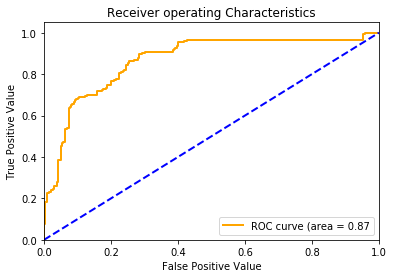

In [13]:
#ROC and AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_probs = reg.predict_proba(x_test)
clf_probs = clf_probs[:,1]
print(clf_probs)
ras = roc_auc_score(y_test,clf_probs)
print("Logistic : ROC AUC = %.3f" %(ras))
from sklearn.preprocessing import label_binarize
y = label_binarize(y_test,classes = [0,2])
n_classes = y.shape[1]
fpr,tpr,_ = roc_curve(y,clf_probs)
plt.figure()
lw = 2
plt.plot(fpr,tpr, color = "orange", lw = lw, label = "ROC curve (area = %0.2f" % ras)
plt.plot([0,1],[0,1], color = "blue",lw = lw, linestyle = '--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.xlabel('False Positive Value')
plt.ylabel('True Positive Value')
plt.title('Receiver operating Characteristics')
plt.legend(loc = "lower right")
plt.show()